In [3]:
import numpy as np
import pandas as pd
from pandas import DataFrame,Series
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [4]:
aod=pd.read_csv('/content/drive/MyDrive/Alcohol and Other Drug Use.csv')
db=pd.read_csv('/content/drive/MyDrive/Dietary Behaviors.csv')
oowc=pd.read_csv('/content/drive/MyDrive/Obesity Overweight and Weight Control.csv')
pa=pd.read_csv('/content/drive/MyDrive/Physical Activity.csv')
sb=pd.read_csv('/content/drive/MyDrive/Sexual Behaviors.csv')
tb=pd.read_csv('/content/drive/MyDrive/Tobacco Use.csv')

In [5]:
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns=None

In [6]:
aod.head(2)

,YEAR,LocationAbbr,LocationDesc,DataSource,Topic,Subtopic,ShortQuestionText,Greater_Risk_Question,Description,Data_Value_Symbol,Data_Value_Type,Greater_Risk_Data_Value,Greater_Risk_Data_Value_Footnote_Symbol,Greater_Risk_Data_Value_Footnote,Greater_Risk_Low_Confidence_Limit,Greater_Risk_High_Confidence_Limit,Lesser_Risk_Question,Lesser_Risk_Data_Value,Lesser_Risk_Data_Value_Footnote_Symbol,Lesser_Risk_Data_Value_Footnote,Lesser_Risk_Low_Confidence_Limit,Lesser_Risk_High_Confidence_Limit,Sample_Size,Sex,Race,Grade,GeoLocation,TopicId,SubTopicID,QuestionCode,LocationId,StratID1,StratID2,StratID3,StratificationType
0,2005,MM,"Miami-Dade County, FL",YRBSS,Alcohol and Other Drug Use,Other Drug Use,Illegal drugs at school,"Were offered, sold, or given an illegal drug o...",during the 12 months before the survey,%,Percentage,NaN,NaN,NaN,NaN,NaN,"Were not offered, sold, or given an illegal dr...",NaN,NaN,NaN,NaN,NaN,3,Total,Multiple Race,9th,"(25.551603, -80.632692)",C03,C15,H58,108.0,S1,R16,G2,Local
1,2017,SA,"San Diego, CA",YRBSS,Alcohol and Other Drug Use,Alcohol Use,Current binge drinking,Reported current binge drinking,four or more drinks of alcohol in a row (if th...,%,Percentage,NaN,NaN,NaN,NaN,NaN,Did not report current binge drink,NaN,NaN,NaN,NaN,NaN,12,Total,American Indian or Alaska Native,Total,"(32.715738, -117.161084)",C03,C14,H44,103.0,S1,R10,G1,Local


In [7]:
db.head(2)

,2005,NYJ,"Borough of Queens, NY",YRBSS,Dietary Behaviors,Milk,Milk drinking >= 2 glasses,N/A,"counting milk in a glass or cup, from a carton, or with cereal and counting the half pint of milk served at school as equal to one glass, during the 7 days before the survey",%,Percentage,83.4499,Unnamed: 12,Unnamed: 13,71.6813,90.9454,Drank two or more glasses per day of milk,16.5501,Unnamed: 18,Unnamed: 19,9.0546,28.3187,242,Total,Total.1,9th,"(40.728224, -73.794852)",C05,C20,QNMILK2,119,S1,R1,G2,Local
0,2009,HI,Hawaii,YRBSS,Dietary Behaviors,Fruit and fruit juices,Fruit consumption >= 3 times,NaN,"such as orange juice, apple juice, or grape ju...",%,Percentage,NaN,NaN,NaN,NaN,NaN,Ate fruit or drank 100% fruit juices three or ...,NaN,NaN,NaN,NaN,NaN,19,Male,Hispanic or Latino,10th,"(21.304850435000446, -157.85774940299973)",C05,C18,QNFR3,15.0,S8,R13,G3,State
1,2009,PW,Palau,YRBSS,Dietary Behaviors,Vegetables,No vegetable eating,Did not eat vegetables,"green salad, potatoes (not counting French fri...",%,Percentage,5.5574,NaN,NaN,4.5097,6.8312,Ate vegetables,94.4426,NaN,NaN,93.1688,95.4903,260,Male,Total,Total,"(7.51498, 134.58252)",C05,C19,QNVEG0,204.0,S8,R1,G1,Territory


In [8]:
oowc.head(2)

,2017,FT,"Broward County, FL",YRBSS,"Obesity, Overweight, and Weight Control",Obesity and Overweight,Overweight,Were overweight,"students who were >= 85th percentile but <95th percentile for body mass index, based on sex- and age-specific reference data from the 2000 CDC growth charts",%,Percentage,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,NULL,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,5,Male,Asian,11th,"(26.190096, -80.365865)",C07,C26,QNOWT,106,S8,R11,G4,Local
0,2007,HI,Hawaii,YRBSS,"Obesity, Overweight, and Weight Control",Obesity and Overweight,Obesity,Had obesity,students who were >= 95th percentile for body ...,%,Percentage,12.0560,NaN,NaN,8.9089,16.1182,NaN,87.9440,NaN,NaN,83.8818,91.0911,398,Total,Asian,Total,"(21.304850435000446, -157.85774940299973)",C07,C26,QNOBESE,15.0,S1,R11,G1,State
1,1999,VT,Vermont,YRBSS,"Obesity, Overweight, and Weight Control",Weight Control,Perception of weight,Described themselves as slightly or very overw...,NaN,%,Percentage,37.4113,NaN,NaN,34.2417,40.6927,NaN,62.5887,NaN,NaN,59.3073,65.7583,875,Female,White,9th,"(43.62538123900049, -72.51764079099962)",C07,C27,H68,50.0,S7,R15,G2,State


In [9]:
pa.head(2)

,2009,FT,"Broward County, FL",YRBSS,Physical Activity,Physical Activity.1,Daily PE attendance,Did not go to physical education (PE) classes on all 5 days,in an average week when they were in school,%,Percentage,71.5654,Unnamed: 12,Unnamed: 13,55.0011,83.8254,Went to physical education (PE) classes on all 5 days,28.4346,Unnamed: 18,Unnamed: 19,16.1746,44.9989,125,Total,Black or African American,9th,"(26.190096, -80.365865)",C06,C25,QNDLYPE,106,S1,R12,G2,Local
0,2015,PB,"Palm Beach County, FL",YRBSS,Physical Activity,Physical Activity,Television watching,Watched television 3 or more hours per day,on an average school day,%,Percentage,NaN,NaN,NaN,NaN,NaN,Did not watch television 3 or more hours per day,NaN,NaN,NaN,NaN,NaN,11,Male,Native Hawaiian or Other Pacific Islander,9th,"(26.65145, -80.276733)",C06,C25,H80,110.0,S8,R14,G2,Local
1,2009,LO,"Los Angeles, CA",YRBSS,Physical Activity,Physical Activity,Physical activity >= 5 days,Were not physically active at least 60 minutes...,doing any kind of physical activity that incre...,%,Percentage,56.0816,NaN,NaN,42.366,68.9271,Were physically active at least 60 minutes per...,43.9184,NaN,NaN,31.0729,57.634,164,Total,Asian,Total,"(34.052234, -118.243685)",C06,C25,H79,100.0,S1,R11,G1,Local


In [10]:
sb.head(2)

,YEAR,LocationAbbr,LocationDesc,DataSource,Topic,Subtopic,ShortQuestionText,Greater_Risk_Question,Description,Data_Value_Symbol,Data_Value_Type,Greater_Risk_Data_Value,Greater_Risk_Data_Value_Footnote_Symbol,Greater_Risk_Data_Value_Footnote,Greater_Risk_Low_Confidence_Limit,Greater_Risk_High_Confidence_Limit,Lesser_Risk_Question,Lesser_Risk_Data_Value,Lesser_Risk_Data_Value_Footnote_Symbol,Lesser_Risk_Data_Value_Footnote,Lesser_Risk_Low_Confidence_Limit,Lesser_Risk_High_Confidence_Limit,Sample_Size,Sex,Race,Grade,GeoLocation,TopicId,SubTopicID,QuestionCode,LocationId,StratID1,StratID2,StratID3,StratificationType
0,2013,MEM,"Memphis, TN",YRBSS,Sexual Behaviors,Sexual Behaviors,IUD or implant use,"Did not use an IUD (e.g., Mirena or ParaGard) ...","to prevent pregnancy, among students who were ...",%,Percentage,NaN,NaN,NaN,NaN,NaN,"Used an IUD (e.g., Mirena or ParaGard) or impl...",NaN,NaN,NaN,NaN,NaN,5,Total,Multiple Race,9th,"(35.149534, -90.04898)",C04,C16,QNIUDIMP,125.0,S1,R16,G2,Local
1,1999,AS,American Samoa,YRBSS,Sexual Behaviors,Sexual Behaviors,No birth control use,Did not use any method to prevent pregnancy du...,among students who were currently sexually active,%,Percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,Total,Multiple Race,9th,"(-31.653381, 161.367188)",C04,C16,QNBCNONE,60.0,S1,R16,G2,Territory


In [11]:
tb.head(2)

,YEAR,LocationAbbr,LocationDesc,DataSource,Topic,Subtopic,ShortQuestionText,Greater_Risk_Question,Description,Data_Value_Symbol,Data_Value_Type,Greater_Risk_Data_Value,Greater_Risk_Data_Value_Footnote_Symbol,Greater_Risk_Data_Value_Footnote,Greater_Risk_Low_Confidence_Limit,Greater_Risk_High_Confidence_Limit,Lesser_Risk_Question,Lesser_Risk_Data_Value,Lesser_Risk_Data_Value_Footnote_Symbol,Lesser_Risk_Data_Value_Footnote,Lesser_Risk_Low_Confidence_Limit,Lesser_Risk_High_Confidence_Limit,Sample_Size,Sex,Race,Grade,GeoLocation,TopicId,SubTopicID,QuestionCode,LocationId,StratID1,StratID2,StratID3,StratificationType
0,1997,WY,Wyoming,YRBSS,Tobacco Use,Cigarette Use,Ever cigarette use,Ever tried cigarette smoking,even one or two puffs,%,Percentage,NaN,NaN,NaN,NaN,NaN,Never tried cigarette smoking,NaN,NaN,NaN,NaN,NaN,0,Male,Multiple Race,11th,"(43.23554134300048, -108.10983035299967)",C02,C12,H30,56.0,S8,R16,G4,State
1,2011,CH,"Chicago, IL",YRBSS,Tobacco Use,Cigarette Use,Current daily cigarette use,Currently smoked cigarettes daily,on all 30 days during the 30 days before the s...,%,Percentage,2.3227,NaN,NaN,0.535,9.513,Did not currently smoke cigarettes daily,97.6773,NaN,NaN,90.487,99.465,131,Male,Hispanic or Latino,9th,"(41.878114, -87.629798)",C02,C12,QNDAYCIG,112.0,S8,R13,G2,Local


In [12]:
oowc.columns=aod.columns
pa.columns=aod.columns
db.columns=aod.columns

In [13]:
student=pd.concat([aod,oowc,pa,tb,sb,db],axis=0,ignore_index=True)
student.head(2)

,YEAR,LocationAbbr,LocationDesc,DataSource,Topic,Subtopic,ShortQuestionText,Greater_Risk_Question,Description,Data_Value_Symbol,Data_Value_Type,Greater_Risk_Data_Value,Greater_Risk_Data_Value_Footnote_Symbol,Greater_Risk_Data_Value_Footnote,Greater_Risk_Low_Confidence_Limit,Greater_Risk_High_Confidence_Limit,Lesser_Risk_Question,Lesser_Risk_Data_Value,Lesser_Risk_Data_Value_Footnote_Symbol,Lesser_Risk_Data_Value_Footnote,Lesser_Risk_Low_Confidence_Limit,Lesser_Risk_High_Confidence_Limit,Sample_Size,Sex,Race,Grade,GeoLocation,TopicId,SubTopicID,QuestionCode,LocationId,StratID1,StratID2,StratID3,StratificationType
0,2005,MM,"Miami-Dade County, FL",YRBSS,Alcohol and Other Drug Use,Other Drug Use,Illegal drugs at school,"Were offered, sold, or given an illegal drug o...",during the 12 months before the survey,%,Percentage,NaN,NaN,NaN,NaN,NaN,"Were not offered, sold, or given an illegal dr...",NaN,NaN,NaN,NaN,NaN,3,Total,Multiple Race,9th,"(25.551603, -80.632692)",C03,C15,H58,108.0,S1,R16,G2,Local
1,2017,SA,"San Diego, CA",YRBSS,Alcohol and Other Drug Use,Alcohol Use,Current binge drinking,Reported current binge drinking,four or more drinks of alcohol in a row (if th...,%,Percentage,NaN,NaN,NaN,NaN,NaN,Did not report current binge drink,NaN,NaN,NaN,NaN,NaN,12,Total,American Indian or Alaska Native,Total,"(32.715738, -117.161084)",C03,C14,H44,103.0,S1,R10,G1,Local


In [14]:
student.shape

(4572597, 35)

In [15]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572597 entries, 0 to 4572596
Data columns (total 35 columns):
 #   Column                                   Dtype  
---  ------                                   -----  
 0   YEAR                                     int64  
 1   LocationAbbr                             object 
 2   LocationDesc                             object 
 3   DataSource                               object 
 4   Topic                                    object 
 5   Subtopic                                 object 
 6   ShortQuestionText                        object 
 7   Greater_Risk_Question                    object 
 8   Description                              object 
 9   Data_Value_Symbol                        object 
 10  Data_Value_Type                          object 
 11  Greater_Risk_Data_Value                  float64
 12  Greater_Risk_Data_Value_Footnote_Symbol  float64
 13  Greater_Risk_Data_Value_Footnote         float64
 14  Greater_Risk_Low_C

**Missing value**

In [16]:
student.isnull().sum()

YEAR                                             0
LocationAbbr                                 32400
LocationDesc                                     0
DataSource                                       0
Topic                                            0
Subtopic                                         0
ShortQuestionText                                0
Greater_Risk_Question                       577439
Description                                 412680
Data_Value_Symbol                                0
Data_Value_Type                                  0
Greater_Risk_Data_Value                    3262138
Greater_Risk_Data_Value_Footnote_Symbol    4572597
Greater_Risk_Data_Value_Footnote           4572597
Greater_Risk_Low_Confidence_Limit          3262138
Greater_Risk_High_Confidence_Limit         3262138
Lesser_Risk_Question                        535319
Lesser_Risk_Data_Value                     3262138
Lesser_Risk_Data_Value_Footnote_Symbol     4572597
Lesser_Risk_Data_Value_Footnote

In [17]:
mis_col=[i for i,j in dict(student.isnull().sum()/len(student)*100).items() if j>60]
mis_col

['Greater_Risk_Data_Value',
 'Greater_Risk_Data_Value_Footnote_Symbol',
 'Greater_Risk_Data_Value_Footnote',
 'Greater_Risk_Low_Confidence_Limit',
 'Greater_Risk_High_Confidence_Limit',
 'Lesser_Risk_Data_Value',
 'Lesser_Risk_Data_Value_Footnote_Symbol',
 'Lesser_Risk_Data_Value_Footnote',
 'Lesser_Risk_Low_Confidence_Limit',
 'Lesser_Risk_High_Confidence_Limit']

In [18]:
df=student.copy()
df.drop(mis_col,axis=1,inplace=True)

In [19]:
df.isnull().sum()

YEAR                          0
LocationAbbr              32400
LocationDesc                  0
DataSource                    0
Topic                         0
Subtopic                      0
ShortQuestionText             0
Greater_Risk_Question    577439
Description              412680
Data_Value_Symbol             0
Data_Value_Type               0
Lesser_Risk_Question     535319
Sample_Size                   0
Sex                           0
Race                          0
Grade                         0
GeoLocation              174840
TopicId                       0
SubTopicID                    0
QuestionCode                  0
LocationId                45240
StratID1                      0
StratID2                      0
StratID3                      0
StratificationType            0
dtype: int64

In [20]:
import geopy
from geopy.geocoders import Nominatim

In [21]:
def geotoloc(x):
  try:
    geoloc=Nominatim(user_agent='GetLoc')
    locname=geoloc.reverse(x)
    return locname.address
  except:
    return x
    


In [22]:
# df['loc']=df['GeoLocation'].apply(geotoloc)

In [23]:
len(df),len(df['LocationAbbr'].unique()),len(df['LocationDesc'].unique()),len(df['GeoLocation'].unique())

(4572597, 91, 91, 86)

In [24]:
df.head(2)

,YEAR,LocationAbbr,LocationDesc,DataSource,Topic,Subtopic,ShortQuestionText,Greater_Risk_Question,Description,Data_Value_Symbol,Data_Value_Type,Lesser_Risk_Question,Sample_Size,Sex,Race,Grade,GeoLocation,TopicId,SubTopicID,QuestionCode,LocationId,StratID1,StratID2,StratID3,StratificationType
0,2005,MM,"Miami-Dade County, FL",YRBSS,Alcohol and Other Drug Use,Other Drug Use,Illegal drugs at school,"Were offered, sold, or given an illegal drug o...",during the 12 months before the survey,%,Percentage,"Were not offered, sold, or given an illegal dr...",3,Total,Multiple Race,9th,"(25.551603, -80.632692)",C03,C15,H58,108.0,S1,R16,G2,Local
1,2017,SA,"San Diego, CA",YRBSS,Alcohol and Other Drug Use,Alcohol Use,Current binge drinking,Reported current binge drinking,four or more drinks of alcohol in a row (if th...,%,Percentage,Did not report current binge drink,12,Total,American Indian or Alaska Native,Total,"(32.715738, -117.161084)",C03,C14,H44,103.0,S1,R10,G1,Local


In [25]:
for i in df['GeoLocation'].unique():
  print(df[df['GeoLocation']==i]['LocationAbbr'].unique())
  print(i)

['MM']
(25.551603, -80.632692)
['SA']
(32.715738, -117.161084)
['HO']
(29.760427, -95.369803)
[]
nan
['WY']
(43.23554134300048, -108.10983035299967)
['MI']
(44.6613195430005, -84.71439026999968)
['CO']
(38.843840757000464, -106.13361092099967)
['MP']
(15.0979, 145.6739)
['MD']
(39.29058096400047, -76.60926011099963)
['KY']
(37.645970271000465, -84.77497104799966)
['UT']
(39.360700171000474, -111.58713063499971)
['NV']
(39.493240390000494, -117.07184056399967)
['PA']
(40.79373015200048, -77.86070029399963)
['SD']
(44.353130053000484, -100.3735306369997)
['SF']
(37.77493, -122.419416)
['PH']
(39.952584, -75.165222)
['AZB']
(34.865970280000454, -111.76381127699972)
['CH']
(41.878114, -87.629798)
['OL']
(28.4845, -81.251883)
['WV']
(38.66551020200046, -80.71264013499967)
['NM']
(34.52088095200048, -106.24058098499967)
['RI']
(41.70828019300046, -71.52247031399963)
['FT']
(26.190096, -80.365865)
['PB']
(26.65145, -80.276733)
['AL']
(32.84057112200048, -86.63186076199969)
['MS']
(32.74551009

* geolocation,locationdesc,locationabbr tells are,so keeping one of them

In [26]:
df['LocationDesc'].unique()

array(['Miami-Dade County, FL', 'San Diego, CA', 'Houston, TX',
       'Cherokee Nation', 'Wyoming', 'Michigan', 'Colorado',
       'Northern Mariana Islands', 'Maryland', 'Kentucky', 'Utah',
       'Nevada', 'Pennsylvania', 'South Dakota', 'San Francisco, CA',
       'Philadelphia, PA', 'Arizona', 'Chicago, IL', 'Orange County, FL',
       'West Virginia', 'New Mexico', 'Rhode Island',
       'Broward County, FL', 'Palm Beach County, FL', 'Alabama',
       'Mississippi', 'Kansas', 'North Dakota', 'Hawaii',
       'Borough of Manhattan, NY', 'New York City, NY', 'Indiana', 'Guam',
       'Montana', 'Boston, MA', 'New York', 'Massachusetts',
       'South Carolina', 'Marshall Islands', 'DeKalb County, GA',
       'Arkansas', 'California', 'Dallas, TX', 'American Samoa',
       'Florida', 'Puerto Rico', 'Texas', 'Borough of Queens, NY',
       'Connecticut', 'Maine', 'Georgia', 'United States', 'Missouri',
       'Iowa', 'Delaware', 'San Bernardino, CA', 'Alaska', 'Nebraska',
       'Ohi

In [27]:
il=['Guam','Northern Mariana Islands','Hawaii','American Samoa']
w=['Alaska']
e=[i for i in df['LocationDesc'].unique() if i not in il and i!='Alaska']
df['region']=df['LocationDesc'].apply(lambda x:'island' if x in il else 'eastern' if x in e else 'western')


In [28]:
df.drop('LocationDesc',axis=1,inplace=True)
df.head(2)

,YEAR,LocationAbbr,DataSource,Topic,Subtopic,ShortQuestionText,Greater_Risk_Question,Description,Data_Value_Symbol,Data_Value_Type,Lesser_Risk_Question,Sample_Size,Sex,Race,Grade,GeoLocation,TopicId,SubTopicID,QuestionCode,LocationId,StratID1,StratID2,StratID3,StratificationType,region
0,2005,MM,YRBSS,Alcohol and Other Drug Use,Other Drug Use,Illegal drugs at school,"Were offered, sold, or given an illegal drug o...",during the 12 months before the survey,%,Percentage,"Were not offered, sold, or given an illegal dr...",3,Total,Multiple Race,9th,"(25.551603, -80.632692)",C03,C15,H58,108.0,S1,R16,G2,Local,eastern
1,2017,SA,YRBSS,Alcohol and Other Drug Use,Alcohol Use,Current binge drinking,Reported current binge drinking,four or more drinks of alcohol in a row (if th...,%,Percentage,Did not report current binge drink,12,Total,American Indian or Alaska Native,Total,"(32.715738, -117.161084)",C03,C14,H44,103.0,S1,R10,G1,Local,eastern


In [29]:
df.drop(['LocationAbbr','GeoLocation'],axis=1,inplace=True)

In [30]:
# df[['Sample_Size','LocationDesc']].to_csv('map.csv',index=False)

In [31]:
df.isnull().sum()

YEAR                          0
DataSource                    0
Topic                         0
Subtopic                      0
ShortQuestionText             0
Greater_Risk_Question    577439
Description              412680
Data_Value_Symbol             0
Data_Value_Type               0
Lesser_Risk_Question     535319
Sample_Size                   0
Sex                           0
Race                          0
Grade                         0
TopicId                       0
SubTopicID                    0
QuestionCode                  0
LocationId                45240
StratID1                      0
StratID2                      0
StratID3                      0
StratificationType            0
region                        0
dtype: int64

In [32]:
df.drop('LocationId',axis=1,inplace=True)

In [33]:
df.head(2)

,YEAR,DataSource,Topic,Subtopic,ShortQuestionText,Greater_Risk_Question,Description,Data_Value_Symbol,Data_Value_Type,Lesser_Risk_Question,Sample_Size,Sex,Race,Grade,TopicId,SubTopicID,QuestionCode,StratID1,StratID2,StratID3,StratificationType,region
0,2005,YRBSS,Alcohol and Other Drug Use,Other Drug Use,Illegal drugs at school,"Were offered, sold, or given an illegal drug o...",during the 12 months before the survey,%,Percentage,"Were not offered, sold, or given an illegal dr...",3,Total,Multiple Race,9th,C03,C15,H58,S1,R16,G2,Local,eastern
1,2017,YRBSS,Alcohol and Other Drug Use,Alcohol Use,Current binge drinking,Reported current binge drinking,four or more drinks of alcohol in a row (if th...,%,Percentage,Did not report current binge drink,12,Total,American Indian or Alaska Native,Total,C03,C14,H44,S1,R10,G1,Local,eastern


In [34]:
len(df.select_dtypes('object').columns)

21

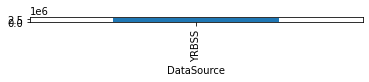

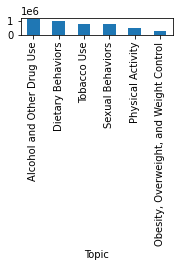

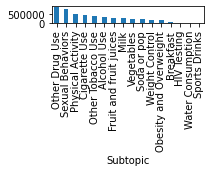

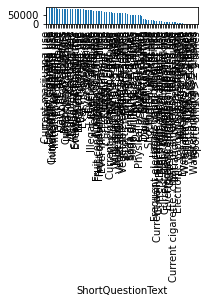

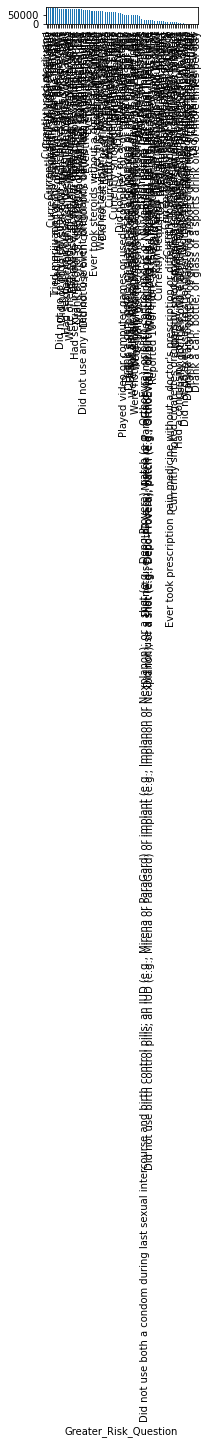

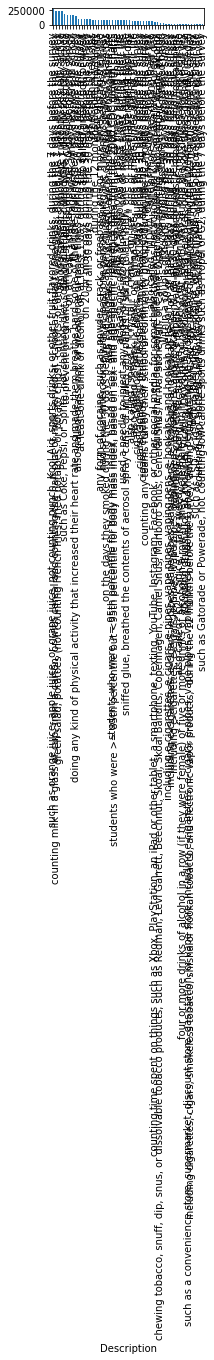

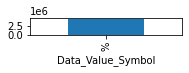

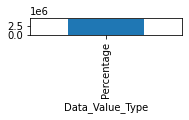

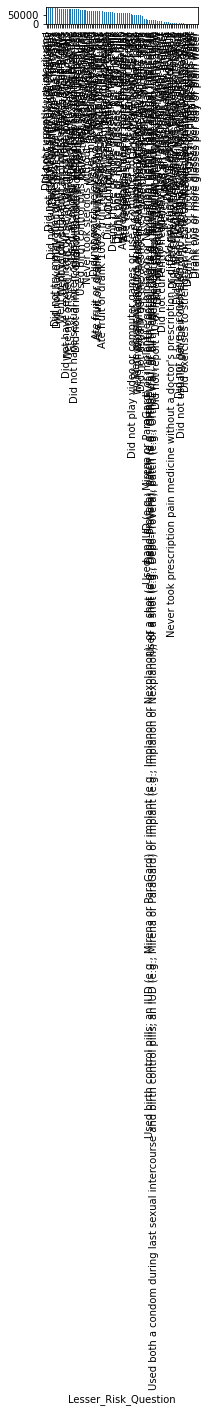

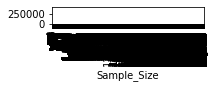

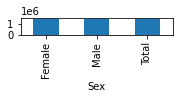

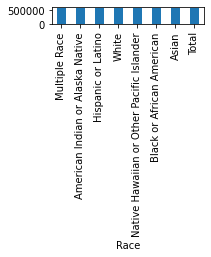

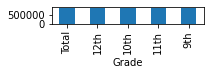

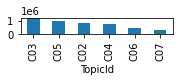

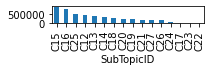

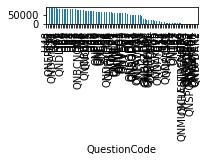

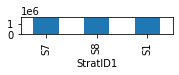

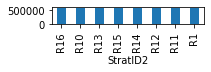

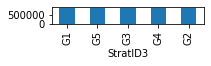

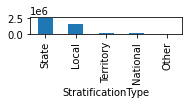

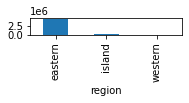

In [35]:
c=1
plt.figure(figsize=[10,10])
for i in df.select_dtypes('object').columns:
  plt.subplot(11,2,c)
  df[i].value_counts().plot(kind='bar')
  plt.xlabel(i)
  c=c+1
  plt.tight_layout()
  plt.show()

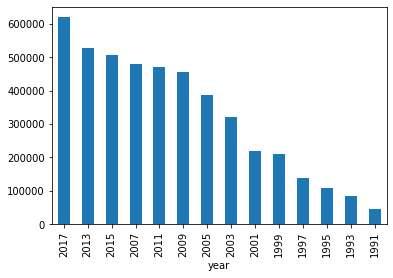

In [36]:
df['YEAR'].value_counts().plot(kind='bar')
plt.xlabel('year')
plt.show()

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572597 entries, 0 to 4572596
Data columns (total 22 columns):
 #   Column                 Dtype 
---  ------                 ----- 
 0   YEAR                   int64 
 1   DataSource             object
 2   Topic                  object
 3   Subtopic               object
 4   ShortQuestionText      object
 5   Greater_Risk_Question  object
 6   Description            object
 7   Data_Value_Symbol      object
 8   Data_Value_Type        object
 9   Lesser_Risk_Question   object
 10  Sample_Size            object
 11  Sex                    object
 12  Race                   object
 13  Grade                  object
 14  TopicId                object
 15  SubTopicID             object
 16  QuestionCode           object
 17  StratID1               object
 18  StratID2               object
 19  StratID3               object
 20  StratificationType     object
 21  region                 object
dtypes: int64(1), object(21)
memory usage: 767.

In [38]:
## deleting data type,data valued,data sourec
df.drop(['DataSource','Data_Value_Symbol','Data_Value_Type'],axis=1,inplace=True)
df.shape

(4572597, 19)

In [39]:
df[df['Description'].isnull()]['Topic'].value_counts()

Sexual Behaviors                           246000
Obesity, Overweight, and Weight Control    166680
Name: Topic, dtype: int64

In [40]:
df[df['Description'].isnull()]['Lesser_Risk_Question'].value_counts()

Were trying to lose weight                                                     83640
Did not have sexual intercourse for the first time before age 13 years         83640
Did not have sexual intercourse with four or more persons during their life    81480
Never had sexual intercourse                                                   80880
Name: Lesser_Risk_Question, dtype: int64

In [41]:
df.isnull().sum()

YEAR                          0
Topic                         0
Subtopic                      0
ShortQuestionText             0
Greater_Risk_Question    577439
Description              412680
Lesser_Risk_Question     535319
Sample_Size                   0
Sex                           0
Race                          0
Grade                         0
TopicId                       0
SubTopicID                    0
QuestionCode                  0
StratID1                      0
StratID2                      0
StratID3                      0
StratificationType            0
region                        0
dtype: int64

In [42]:
# for i in df[df['Description'].isnull()].index:
#   a=df.loc[i,'Topic']
#   b=df[df['Topic']==a]['Description'].mode()
#   for m in b:
#       df.loc[i,'Description']=m
    

In [43]:
df['Topic'].unique()

array(['Alcohol and Other Drug Use',
       'Obesity, Overweight, and Weight Control', 'Physical Activity',
       'Tobacco Use', 'Sexual Behaviors', 'Dietary Behaviors'],
      dtype=object)

In [44]:
a1=df[df['Topic']=='Alcohol and Other Drug Use']
for i in a1['Description'].mode():
  a1['Description'].fillna(i,inplace=True)

In [45]:
a2=df[df['Topic']=='Obesity, Overweight, and Weight Control']
for i in a2['Description'].mode():
  a2['Description'].fillna(i,inplace=True)
for i in a2['Lesser_Risk_Question'].mode():
  a2['Lesser_Risk_Question'].fillna(i,inplace=True)

In [46]:
a3=df[df['Topic']=='Physical Activity']
for i in a3['Description'].mode():
  a3['Description'].fillna(i,inplace=True)

In [47]:
a4=df[df['Topic']=='Tobacco Use']
for i in a4['Description'].mode():
  a4['Description'].fillna(i,inplace=True)
for i in a4['Lesser_Risk_Question'].mode():
  a4['Lesser_Risk_Question'].fillna(i,inplace=True)

In [48]:
a5=df[df['Topic']=='Sexual Behaviors']
for i in a5['Description'].mode():
  a5['Description'].fillna(i,inplace=True)
for i in a5['Lesser_Risk_Question'].mode():
  a5['Lesser_Risk_Question'].fillna(i,inplace=True)

In [49]:
a6=df[df['Topic']=='Dietary Behaviors']
for i in a6['Description'].mode():
  a6['Description'].fillna(i,inplace=True)
for i in a6['Greater_Risk_Question'].mode():
  a6['Greater_Risk_Question'].fillna(i,inplace=True)
for i in a6['Lesser_Risk_Question'].mode():
  a6['Lesser_Risk_Question'].fillna(i,inplace=True)

In [50]:
a1.isnull().sum()

YEAR                     0
Topic                    0
Subtopic                 0
ShortQuestionText        0
Greater_Risk_Question    0
Description              0
Lesser_Risk_Question     0
Sample_Size              0
Sex                      0
Race                     0
Grade                    0
TopicId                  0
SubTopicID               0
QuestionCode             0
StratID1                 0
StratID2                 0
StratID3                 0
StratificationType       0
region                   0
dtype: int64

In [51]:
df=pd.concat([a1,a2,a3,a4,a5,a6],axis=0,ignore_index=True)

In [52]:
df.shape

(4572597, 19)

In [53]:
df.head(2)

,YEAR,Topic,Subtopic,ShortQuestionText,Greater_Risk_Question,Description,Lesser_Risk_Question,Sample_Size,Sex,Race,Grade,TopicId,SubTopicID,QuestionCode,StratID1,StratID2,StratID3,StratificationType,region
0,2005,Alcohol and Other Drug Use,Other Drug Use,Illegal drugs at school,"Were offered, sold, or given an illegal drug o...",during the 12 months before the survey,"Were not offered, sold, or given an illegal dr...",3,Total,Multiple Race,9th,C03,C15,H58,S1,R16,G2,Local,eastern
1,2017,Alcohol and Other Drug Use,Alcohol Use,Current binge drinking,Reported current binge drinking,four or more drinks of alcohol in a row (if th...,Did not report current binge drink,12,Total,American Indian or Alaska Native,Total,C03,C14,H44,S1,R10,G1,Local,eastern


In [54]:
df.isnull().sum()

YEAR                     0
Topic                    0
Subtopic                 0
ShortQuestionText        0
Greater_Risk_Question    0
Description              0
Lesser_Risk_Question     0
Sample_Size              0
Sex                      0
Race                     0
Grade                    0
TopicId                  0
SubTopicID               0
QuestionCode             0
StratID1                 0
StratID2                 0
StratID3                 0
StratificationType       0
region                   0
dtype: int64

In [55]:
from textblob import TextBlob

In [56]:
def sentiments(x):
  a=TextBlob(x)
  return a.sentiment.polarity

In [57]:
df['Description']=df['Description'].apply(sentiments)

In [58]:
df['ShortQuestionText']=df['ShortQuestionText'].apply(sentiments)
df['Greater_Risk_Question']=df['Greater_Risk_Question'].apply(sentiments)


**When we  do sentiments analysis on Greater_Risk_Question and Lesser_Risk_Question, we get same values so keeping only one of them**

In [59]:
df.drop('Lesser_Risk_Question',axis=1,inplace=True)

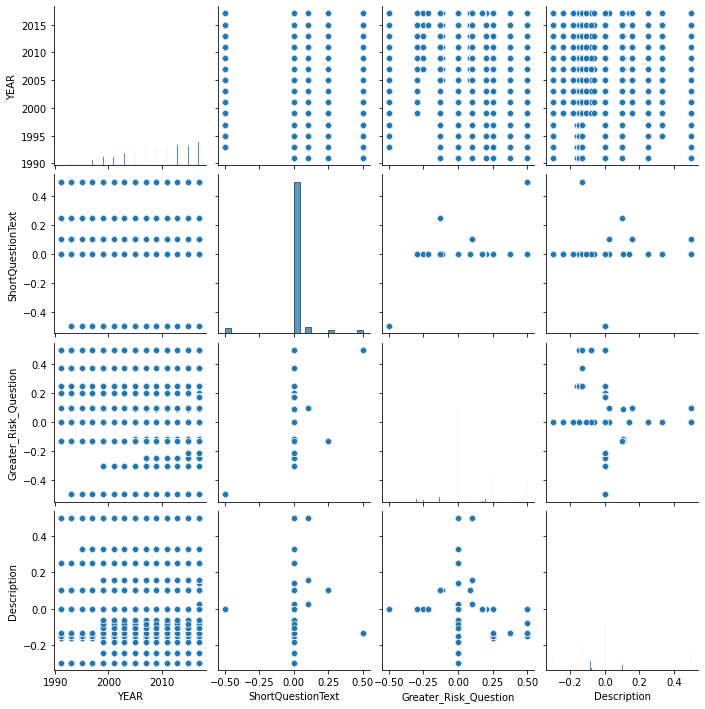

In [60]:
sns.pairplot(df)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572597 entries, 0 to 4572596
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   YEAR                   int64  
 1   Topic                  object 
 2   Subtopic               object 
 3   ShortQuestionText      float64
 4   Greater_Risk_Question  float64
 5   Description            float64
 6   Sample_Size            object 
 7   Sex                    object 
 8   Race                   object 
 9   Grade                  object 
 10  TopicId                object 
 11  SubTopicID             object 
 12  QuestionCode           object 
 13  StratID1               object 
 14  StratID2               object 
 15  StratID3               object 
 16  StratificationType     object 
 17  region                 object 
dtypes: float64(3), int64(1), object(14)
memory usage: 628.0+ MB


In [62]:
df['Sample_Size'].str.split(',',expand=True)[0].astype('object')+df['Sample_Size'].str.split(',',expand=True)[1].astype('object')

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
4572592    NaN
4572593    NaN
4572594    NaN
4572595    NaN
4572596    NaN
Length: 4572597, dtype: object

In [63]:
df['Sample_Size']=df['Sample_Size'].apply(lambda x:''.join(x.split(',')) if ',' in x else x)

In [64]:
df['Sample_Size']=df['Sample_Size'].astype(int)

In [65]:
len(df.select_dtypes(include=object).columns)

13

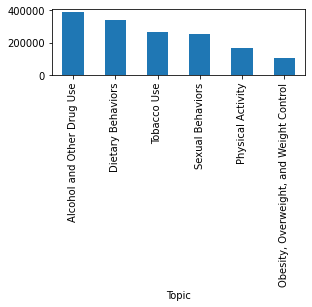

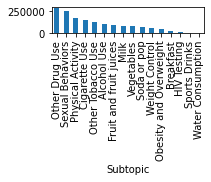

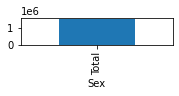

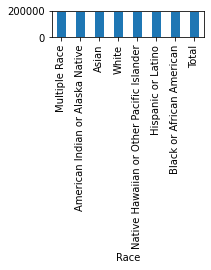

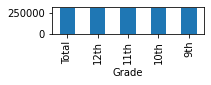

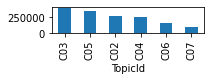

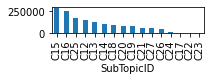

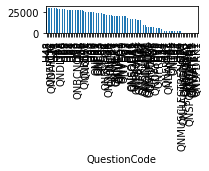

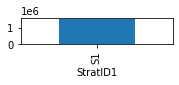

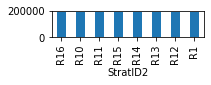

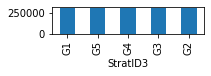

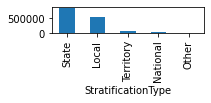

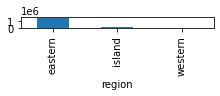

In [66]:
c=1
plt.figure(figsize=[10,10])
for i in df.select_dtypes(include=object).columns:
  plt.subplot(7,2,c)
  df[df['Sex']=='Total'][i].value_counts().plot(kind='bar')
  plt.xlabel(i)
  c=c+1
  plt.tight_layout()
  plt.show()

* we have sex as a total only in statID1

In [67]:
df[df['StratID1']=='S1']['Sex'].unique()

array(['Total'], dtype=object)

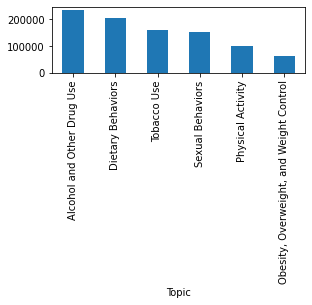

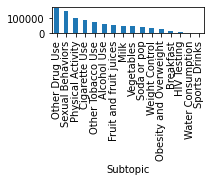

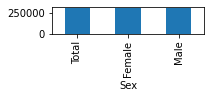

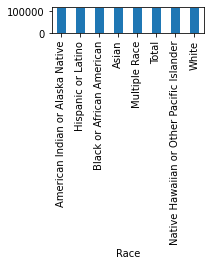

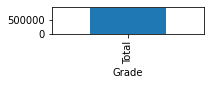

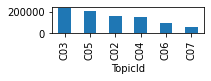

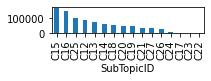

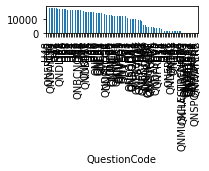

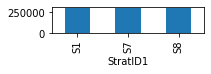

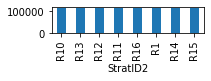

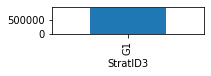

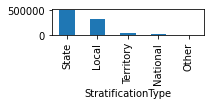

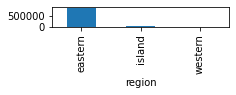

In [68]:
c=1
plt.figure(figsize=[10,10])
for i in df.select_dtypes(include=object).columns:
  plt.subplot(7,2,c)
  df[df['Grade']=='Total'][i].value_counts().plot(kind='bar')
  plt.xlabel(i)
  c=c+1
  plt.tight_layout()
  plt.show()

* we have Grade as a total only in statID3

In [69]:
df[df['StratID3']=='G1']['Grade'].unique()

array(['Total'], dtype=object)

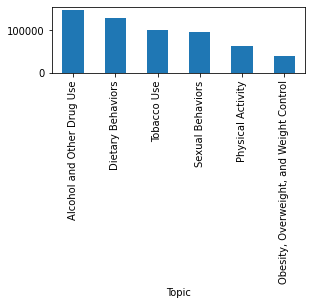

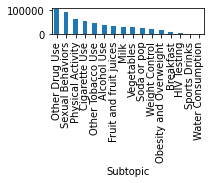

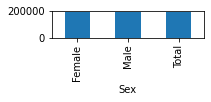

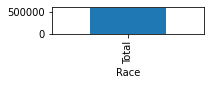

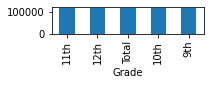

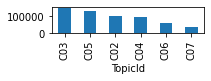

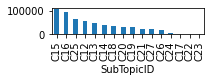

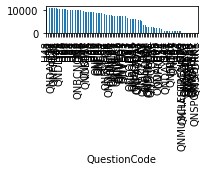

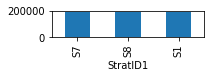

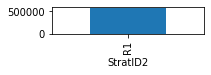

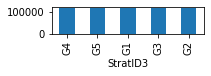

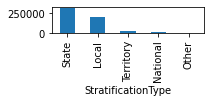

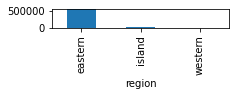

In [70]:
c=1
plt.figure(figsize=[10,10])
for i in df.select_dtypes(include=object).columns:
  plt.subplot(7,2,c)
  df[df['Race']=='Total'][i].value_counts().plot(kind='bar')
  plt.xlabel(i)
  c=c+1
  plt.tight_layout()
  plt.show()

* we have Race as a total only in statID2

In [71]:
df[df['StratID2']=='R1']['Race'].unique()

array(['Total'], dtype=object)

In [72]:
df.columns

Index(['YEAR', 'Topic', 'Subtopic', 'ShortQuestionText',
       'Greater_Risk_Question', 'Description', 'Sample_Size', 'Sex', 'Race',
       'Grade', 'TopicId', 'SubTopicID', 'QuestionCode', 'StratID1',
       'StratID2', 'StratID3', 'StratificationType', 'region'],
      dtype='object')

In [73]:
df['Subtopic'].value_counts()

Other Drug Use            855720
Sexual Behaviors          740400
Physical Activity         498119
Cigarette Use             433560
Other Tobacco Use         368280
Alcohol Use               320400
Fruit and fruit juices    278880
Milk                      245759
Vegetables                244320
Soda or pop               191520
Weight Control            166680
Obesity and Overweight    149039
Breakfast                  56160
HIV Testing                21840
Water Consumption            960
Sports Drinks                960
Name: Subtopic, dtype: int64

In [74]:
df['SubTopicID'].value_counts()

C15    855720
C16    740400
C25    498119
C12    433560
C13    368280
C14    320400
C18    278880
C20    245759
C19    244320
C21    191520
C27    166680
C26    149039
C24     56160
C17     21840
C23       960
C22       960
Name: SubTopicID, dtype: int64

* SubTopicID and subtopic is same so keeping one of them

In [75]:
df['TopicId'].value_counts()

C03    1176120
C05    1018559
C02     801840
C04     762240
C06     498119
C07     315719
Name: TopicId, dtype: int64

In [76]:
df['Topic'].value_counts()

Alcohol and Other Drug Use                 1176120
Dietary Behaviors                          1018559
Tobacco Use                                 801840
Sexual Behaviors                            762240
Physical Activity                           498119
Obesity, Overweight, and Weight Control     315719
Name: Topic, dtype: int64

* Topic and topicid is same so keeping one of them

In [77]:
df.drop(['Topic','SubTopicID'],axis=1,inplace=True)

In [78]:
df.shape

(4572597, 16)

* lets treat grade column using label encoding

In [79]:
df['Grade']=df['Grade'].map(dict(zip(df['Grade'].unique(),[0,4,3,1,2])))

* lets treat topicid,subtopicid,strataids,QuestionCode column using frequncy encoding

In [80]:
df['TopicId']=df['TopicId'].map(dict(df['TopicId'].value_counts()/len(df)))

In [81]:
df.columns

Index(['YEAR', 'Subtopic', 'ShortQuestionText', 'Greater_Risk_Question',
       'Description', 'Sample_Size', 'Sex', 'Race', 'Grade', 'TopicId',
       'QuestionCode', 'StratID1', 'StratID2', 'StratID3',
       'StratificationType', 'region'],
      dtype='object')

In [82]:
df['Subtopic']=df['Subtopic'].map(dict(df['Subtopic'].value_counts()/len(df)))
df['StratID1']=df['StratID1'].map(dict(df['StratID1'].value_counts()/len(df)))
df['StratID2']=df['StratID2'].map(dict(df['StratID2'].value_counts()/len(df)))
df['StratID3']=df['StratID3'].map(dict(df['StratID3'].value_counts()/len(df)))

In [83]:
df['QuestionCode']=df['QuestionCode'].map(dict(df['QuestionCode'].value_counts()/len(df)))

In [84]:
df.head()

,YEAR,Subtopic,ShortQuestionText,Greater_Risk_Question,Description,Sample_Size,Sex,Race,Grade,TopicId,QuestionCode,StratID1,StratID2,StratID3,StratificationType,region
0,2005,0.187141,-0.5,-0.5,0.00,3,Total,Multiple Race,0,0.257211,0.017924,0.333333,0.125,0.2,Local,eastern
1,2017,0.070070,0.0,0.0,0.14,12,Total,American Indian or Alaska Native,4,0.257211,0.001758,0.333333,0.125,0.2,Local,eastern
2,1995,0.187141,0.0,0.0,0.25,335,Female,Hispanic or Latino,4,0.257211,0.018370,0.333334,0.125,0.2,Local,eastern
3,2017,0.187141,0.0,0.0,0.25,11,Female,Multiple Race,3,0.257211,0.018370,0.333334,0.125,0.2,Other,eastern
4,2013,0.070070,0.0,0.0,-0.30,13,Female,Black or African American,4,0.257211,0.019551,0.333334,0.125,0.2,State,eastern


In [85]:
df['Race'].unique()

array(['Multiple Race', 'American Indian or Alaska Native',
       'Hispanic or Latino', 'Black or African American', 'Asian',
       'White', 'Total', 'Native Hawaiian or Other Pacific Islander'],
      dtype=object)

In [86]:
m=['Multiple Race','American Indian or Alaska Native','Hispanic or Latino','Black or African American','Native Hawaiian or Other Pacific Islander']
s=[i for i in df['Race'].unique() if i not in m]
s

['Asian', 'White', 'Total']

In [87]:
df['Race']=df['Race'].apply(lambda x:'multiple_race' if x in m else 'single_race')

* hot label encoding for rest of categorical columns

In [88]:
df=pd.get_dummies(df,drop_first=True)

In [89]:
df.shape

(4572597, 21)

**PCA**

* Scaling the data set

In [90]:
from sklearn.preprocessing import MinMaxScaler
ss=MinMaxScaler()
scaled=ss.fit_transform(df)
scaled_df=DataFrame(scaled,columns=df.columns)

In [91]:
scaled_df.head(2)

,YEAR,Subtopic,ShortQuestionText,Greater_Risk_Question,Description,Sample_Size,Grade,TopicId,QuestionCode,StratID1,StratID2,StratID3,Sex_Male,Sex_Total,Race_single_race,StratificationType_National,StratificationType_Other,StratificationType_State,StratificationType_Territory,region_island,region_western
0,0.538462,1.000000,0.0,0.0,0.375,0.000055,0.0,1.0,0.915323,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.373719,0.5,0.5,0.550,0.000219,1.0,1.0,0.087366,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
cov_mat=np.cov(scaled.T)

In [93]:
e_v,e_g=np.linalg.eig(cov_mat)

In [94]:
per=[i/sum(e_v)*100 for i in e_v]


In [95]:
np.cumsum(per)

array([ 18.75471339,  34.64543567,  46.34024856,  57.62055916,
        67.11560867,  73.58374269,  79.36212213,  83.26588677,
        86.52658943,  89.55067518,  91.84638813,  93.17557288,
        93.1822216 ,  94.05501125,  94.84834659,  95.26517657,
        95.78798114,  96.26928359,  98.10555638, 100.        ,
       100.        ])

* 9 pc gives more than 85% variance so taking 9 pcas

In [97]:
scaled_df.to_csv('scaled.csv',index=False)

In [96]:
# from sklearn.decomposition import PCA
# pca=PCA(n_components=9)
# pcadata=pca.fit_transform(scaled)
# pca_df=DataFrame(pcadata,columns=['pca1','pca2','pca3','pca4','pca5','pca6','pca7','pca8','pca9'])
# pca_df.head()